In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../../")

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps, ImageEnhance
from src.filter_reconst import filter_reconstruct
from src.compress_sensing_library import generate_Y, reconstruct, color_reconstruct
import pandas as pd
import seaborn as sns
import time
import os.path

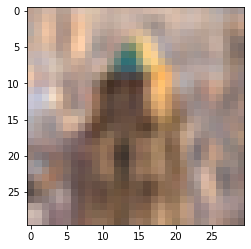

In [10]:
image_path = '../../image/city_part2.png'
num_cell = 500
cell_size = 7
sparse_freq = 2
# alpha = 0.3


img = Image.open(image_path)
img_arr = np.asarray(img)

plt.imshow(color_reconstruct(img_arr, num_cell, cell_size, sparse_freq))


# dim = img_arr.shape

# i = 0
# dim = img_arr[:,:,i].shape

# W = V1_weights(num_cell, dim, cell_size, sparse_freq) 
# final = np.zeros(img_arr.shape)

# # with same V1 cells generated, reconstruct images for each of 3 rgb arrays and append to final
# while (i < 3):
#     img_arr_pt = img_arr[:,:,i]
#     img_arr_pt_dim = img_arr_pt.shape
#     n_pt, m_pt = img_arr_pt_dim
#     y = generate_Y(W, img_arr_pt)
#     W_model = W.reshape(num_cell, n_pt, m_pt)
#     theta, reconst, s = reconstruct(W_model, y, alpha)
#     final[:,:,i] = reconst
#     i+=1
    
# final = np.round(final).astype(int)
# final[final < 0] = 0
# final[final > 255] = 255
# final = final.astype(int)

# plt.imshow(img_arr)
# plt.title("original image")
# plt.show()

# plt.imshow(final, vmin = 0, vmax=255)
# plt.title("reconstructed RGB image")
# plt.show()


In [103]:
np.max(final)

656

In [73]:
np.min(img_arr - final)

-529.6951867220534

In [74]:
img_arr[0:, ]

array([[[192, 167, 154],
        [193, 165, 149],
        [200, 168, 150],
        ...,
        [176, 165, 160],
        [155, 141, 140],
        [165, 150, 148]],

       [[185, 164, 155],
        [203, 176, 157],
        [229, 189, 163],
        ...,
        [175, 152, 139],
        [191, 162, 147],
        [187, 165, 154]],

       [[186, 165, 156],
        [195, 172, 154],
        [238, 194, 162],
        ...,
        [180, 153, 138],
        [185, 145, 121],
        [197, 161, 136]],

       ...,

       [[168, 147, 138],
        [195, 176, 166],
        [163, 145, 143],
        ...,
        [161, 144, 144],
        [147, 130, 132],
        [157, 135, 136]],

       [[200, 180, 171],
        [211, 191, 187],
        [158, 137, 139],
        ...,
        [171, 146, 140],
        [152, 132, 131],
        [162, 141, 134]],

       [[201, 180, 172],
        [192, 172, 166],
        [147, 128, 127],
        ...,
        [152, 123, 112],
        [139, 118, 111],
        [113,  97,  95]]

In [75]:
np.max(final)

701.6951867220534

In [76]:
img_arr_grey = ImageOps.grayscale(img)
img_arr_grey = np.asarray(img_arr_grey)

In [77]:
filter_reconstruction(num_cell = num_cell, img_arr = img_arr_grey, 
                                          sparse_freq = sparse_freq, cell_size = cell_size, alpha = alpha, filter_dim = (10, 10))

(40, 40)
iteration 3
iteration 6
iteration 9
iteration 12
iteration 15


/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase th

array([[173.06270065, 172.88450331, 176.21004111, 184.79790697,
        178.63988431, 165.61085871, 191.93880409, 189.87931381,
        224.24015751, 189.93588499, 179.56677635, 187.33011292,
        181.92810718, 183.78440765, 179.0118928 , 178.90855992,
        186.85916282, 189.07524409, 193.84523925, 194.65310273,
        189.56589049, 188.8822059 , 187.64822991, 183.97721718,
        179.55186907, 170.5369268 , 173.85020251, 163.73152458,
        149.13180415, 152.3467739 ],
       [170.29750251, 178.96954593, 198.97045433, 190.96033367,
        162.07671459, 154.19876333, 193.73534544, 194.14549555,
        204.26795885, 185.43907776, 180.69921202, 180.53663221,
        178.94156572, 189.7058116 , 193.25464963, 186.33727916,
        167.22151719, 166.04938899, 176.99258416, 195.18018172,
        188.30879881, 187.38541493, 188.86561524, 192.63371221,
        191.90286751, 179.06524425, 174.62317627, 165.72414576,
        162.59723926, 171.7891147 ],
       [168.99155138, 177.5875

In [1]:
plt.imshow([[173.06270065, 172.88450331, 176.21004111, 184.79790697,
        178.63988431, 165.61085871, 191.93880409, 189.87931381,
        224.24015751, 189.93588499, 179.56677635, 187.33011292,
        181.92810718, 183.78440765, 179.0118928 , 178.90855992,
        186.85916282, 189.07524409, 193.84523925, 194.65310273,
        189.56589049, 188.8822059 , 187.64822991, 183.97721718,
        179.55186907, 170.5369268 , 173.85020251, 163.73152458,
        149.13180415, 152.3467739 ],
       [170.29750251, 178.96954593, 198.97045433, 190.96033367,
        162.07671459, 154.19876333, 193.73534544, 194.14549555,
        204.26795885, 185.43907776, 180.69921202, 180.53663221,
        178.94156572, 189.7058116 , 193.25464963, 186.33727916,
        167.22151719, 166.04938899, 176.99258416, 195.18018172,
        188.30879881, 187.38541493, 188.86561524, 192.63371221,
        191.90286751, 179.06524425, 174.62317627, 165.72414576,
        162.59723926, 171.7891147 ],
       [168.99155138, 177.58754153, 204.68948916, 187.22800948,
        149.45803403, 149.67797914, 200.05401215, 207.92020055,
        191.37092986, 186.31224031, 185.08311614, 170.73850723,
        182.61019846, 189.4010389 , 178.82036001, 172.77839663,
        158.05489183, 154.81464796, 151.31483176, 176.38755642,
        194.36755086, 189.25178236, 185.02289287, 183.50527904,
        179.88213028, 172.80736123, 168.02886674, 154.64879903,
        156.51981916, 168.48026532],
       [174.47492715, 183.92297057, 208.0585475 , 188.74361289,
        152.07994314, 154.57318174, 202.08718856, 214.21957389,
        186.46904755, 181.9220516 , 177.96829018, 151.15707523,
        172.74148967, 190.43247772, 174.83923889, 187.01452145,
        175.91569978, 164.88354995, 153.30753775, 172.34007336,
        181.66963758, 174.09835034, 167.26639696, 162.63954914,
        162.08702168, 174.65667887, 176.24557861, 148.03639984,
        139.97404662, 147.03776122],
       [175.677247  , 184.42798042, 205.38342433, 191.50823637,
        153.80346584, 155.41989258, 201.31285176, 212.12661537,
        184.38299249, 170.05935845, 158.51219075, 139.30979125,
        158.26136818, 181.71222627, 166.00631482, 218.57733367,
        199.70717039, 185.86053847, 173.40996901, 175.74150894,
        163.2537855 , 162.5691045 , 164.23106374, 164.07907917,
        162.95347586, 179.87569321, 180.20377592, 139.70153237,
        118.96736287, 116.70208648],
       [186.07538683, 179.83042949, 190.34284919, 187.32166006,
        155.63350696, 158.36680509, 206.98689042, 212.04152868,
        185.51338048, 167.21026571, 147.67614518, 154.42134015,
        156.56050709, 134.02060654, 102.63080173, 198.04281771,
        200.79399852, 194.70133382, 178.86384574, 172.59699592,
        159.01901725, 160.17037227, 161.69553332, 163.04127919,
        160.07407039, 172.15920763, 175.40201291, 142.7128747 ,
        121.36505788, 115.42677038],
       [183.73870966, 179.12111874, 188.61867933, 189.96732782,
        168.61266927, 169.12289555, 206.78523639, 206.2332566 ,
        179.54386643, 160.12849181, 147.26829912, 159.39139865,
        143.01299136, 105.53292984,  84.39051488, 170.18593437,
        215.21810789, 202.87829713, 182.71068716, 153.36424339,
        153.47886413, 156.4315758 , 156.63217046, 157.61030578,
        155.27566061, 163.1856859 , 169.1504806 , 145.99518097,
        125.38930683, 121.14461418],
       [184.01020544, 180.44701869, 193.76696763, 196.73808181,
        185.93553356, 173.80669837, 174.37500513, 176.35859624,
        170.3531189 , 163.95358752, 178.59519298, 153.96891179,
        110.79775165,  98.085593  ,  94.56639586, 132.15996503,
        220.02556559, 201.08116173, 197.6637739 , 160.31735294,
        149.56830759, 153.32127925, 154.05359817, 153.17379034,
        155.26626259, 165.36410557, 168.6444263 , 146.40864134,
        123.91726952, 121.09124973],
       [202.59168516, 180.24092302, 193.64758625, 196.0266698 ,
        185.57619148, 176.01315275, 164.12329631, 172.75515911,
        173.09162721, 173.92103339, 193.15581184, 132.57546303,
         91.84793232,  95.26890466, 100.8735029 , 103.41814224,
        177.74809315, 174.8458277 , 186.96163912, 185.37185405,
        156.6723418 , 163.01470836, 169.64754202, 165.91452587,
        167.77044029, 176.17293113, 171.48842345, 154.46428966,
        139.0306542 , 135.27903726],
       [211.80701219, 173.50825538, 190.78955689, 190.92146654,
        166.03043138, 160.65115951, 154.43314227, 161.33012922,
        154.57381604, 165.34557002, 120.94490156,  64.02782851,
         70.98175105,  75.85230208,  77.78128988,  67.06856022,
        120.11261314, 188.58150019, 193.78641543, 198.21402447,
        171.87632496, 174.90181902, 182.02282398, 175.90062794,
        178.03711919, 183.6160139 , 170.33408369, 159.00331615,
        151.98987677, 144.93850518],
       [203.2425306 , 163.95765596, 173.19091567, 194.31029788,
        159.80763099, 160.74213295, 158.24942486, 140.24466186,
        154.75851882, 114.68270051,  74.72545317,  55.8073111 ,
         60.67999557,  62.25726029,  63.8804592 ,  56.23907988,
        116.01063765, 203.80999515, 171.05819077, 199.5857686 ,
        173.52136527, 161.7792316 , 169.31367464, 147.17143104,
        137.47613892, 180.99433031, 176.23845954, 136.08580662,
        140.54327104, 121.60268696],
       [198.59574736, 187.10537831, 199.78951898, 231.2444569 ,
        178.10706849, 142.08564027, 152.7077375 , 152.80780717,
        175.2826099 , 110.95858614,  77.19041608,  72.36416689,
         67.10513339,  67.46472788,  79.7930762 ,  68.672971  ,
        124.42109381, 205.24551196, 182.00521217, 204.23430758,
        160.9250547 , 153.6170699 , 157.26036042, 141.66288095,
        136.3444034 , 173.95849303, 167.18532366, 126.71414376,
        132.00604907, 128.58038838],
       [199.22362374, 197.94198425, 200.79685526, 237.37597011,
        192.63860712, 149.61119044, 146.38411893, 138.38806954,
        169.81309158, 120.92444925,  84.01620494,  82.13308016,
         77.35570794,  85.51918779,  89.33524135,  76.49666954,
        140.45661613, 211.6801812 , 182.09251096, 174.78135207,
        132.11682696, 140.53678354, 151.38955786, 142.73716951,
        141.10225711, 158.64234741, 145.11415784, 121.14856809,
        131.83417695, 135.50854585],
       [198.59344441, 202.80901296, 192.14052237, 208.00801777,
        175.29359779, 167.06622308, 142.14088177, 130.40261278,
        158.59283653, 115.76534143,  69.23231442,  81.82067815,
         76.50082962,  73.34941586,  74.19440145,  80.05523914,
        117.27367949, 163.65847099, 156.66651597, 144.77780548,
        132.64498075, 132.08374172, 147.38049056, 141.53519997,
        142.69108863, 144.19658468, 129.96970401, 125.18463946,
        135.32975416, 138.2192162 ],
       [188.5397803 , 180.94561349, 163.75117558, 170.70058091,
        159.89450148, 194.35596654, 160.0954839 , 166.29132925,
        174.19240654,  94.907299  ,  68.86175071,  81.49343287,
         76.63280847,  74.50772947,  80.08406904,  81.34116505,
         81.62593724, 149.49968773, 197.74395304, 170.14371255,
        131.50432867, 115.99544598, 134.55363914, 134.62807984,
        145.52281846, 146.72608532, 132.19122649, 132.20499332,
        140.04672198, 147.76082113],
       [174.56719307, 166.25757589, 166.50155872, 171.23246009,
        159.18090889, 199.2367729 , 172.53182809, 175.47821431,
        162.83041501,  84.25026729,  82.0267234 ,  79.75942155,
         85.7261994 ,  90.30398196,  96.41078922, 100.39802768,
         87.02104565, 120.91485018, 153.59347963, 109.59261591,
         88.13842726, 119.53073824, 165.91387809, 166.63065634,
        157.29336192, 145.93520615, 136.38939606, 142.34181437,
        141.02482898, 138.98757552],
       [170.80736506, 157.84486896, 148.18407032, 148.1237142 ,
        148.15076808, 190.3289754 , 187.16095491, 134.34096885,
         93.76878905,  66.52656335,  72.02998913,  73.20055067,
         86.8064892 ,  70.99580882,  63.07845635,  77.08838771,
         75.65441146,  70.50791154, 101.58084355, 100.6841079 ,
        126.70242222, 157.41852009, 159.87305156, 152.92308188,
        142.78059902, 137.96252201, 137.94512565, 142.13152548,
        138.60115082, 141.55229554],
       [162.1453873 , 160.94621395, 147.98533935, 148.50014134,
        143.61864967, 138.96687906, 151.08405969, 100.30771135,
         71.32599397,  92.22776275,  89.88254864, 107.10548382,
        113.97156703,  90.61854277,  91.03335644,  91.52531413,
         88.05815669, 111.50376674, 156.54617172, 139.34388142,
        128.20526097, 178.10417382, 160.0911421 , 156.54939219,
        145.80250665, 142.46191795, 142.55805004, 143.34380795,
        146.17170821, 155.41820146],
       [149.28221948, 151.64488648, 139.08717401, 148.44046405,
        142.67427212, 101.72374579, 117.18195052, 105.0444034 ,
         89.42929363, 115.58002731, 113.25461727, 120.92506572,
         94.51507714,  78.14295   , 115.86574092, 126.73280038,
        105.21936597, 142.00202299, 152.33586793,  63.84432764,
        105.5848139 , 170.34376438, 149.2595188 , 144.41760844,
        140.22302953, 154.77396768, 148.30327432, 130.64710168,
        135.418496  , 146.21101782],
       [131.39497223, 136.56804422, 121.50835464, 133.78878005,
        132.98904459, 102.45479316, 118.47223749, 109.87403915,
         90.36377394, 113.2560433 , 112.16466221, 109.16555216,
         61.89584854,  39.87863306,  83.30596722, 118.99830134,
         98.74692745, 139.78727669, 151.78379917,  74.15729533,
        114.68849536, 170.56735866, 141.68099691, 119.07396386,
        110.22273979, 154.30083889, 162.75853333, 132.14829556,
        130.35685437, 139.0306766 ],
       [125.54604477, 118.17358132, 120.08210367, 118.23359372,
        120.69617818, 109.97758032,  90.71126703,  90.28492028,
         98.11073815, 114.08633583, 115.67255884, 126.55720471,
         70.6875533 ,  45.73930637, 106.39523664, 125.60216347,
         99.95500808, 142.66844421, 156.97677152,  88.14087049,
        120.94770198, 155.28240095, 106.4998323 , 141.22912277,
        153.26600925, 177.20043085, 156.19519386, 147.96219329,
        133.37897284, 125.33795132],
       [156.32929261, 149.72819624, 138.62145426, 108.15315655,
        103.25305525, 105.32018194,  92.61610899,  85.53030672,
         90.07771899, 108.66738926, 105.52399363, 123.41802428,
         77.62180437,  57.28239137, 107.48909823, 125.40855932,
         99.269974  , 143.72557064, 157.46781616,  83.20771982,
        125.83168618, 140.62118409, 121.33867923, 141.75157438,
        165.57914594, 156.08886921, 131.80178835, 139.2007268 ,
        140.32522515, 121.81720151],
       [156.130419  , 142.63327424, 141.61923712, 126.39143493,
        128.63856408, 114.89842779,  90.20097237,  84.15518234,
         90.5685726 , 110.69597104, 106.25433172, 121.9376878 ,
         82.49445551,  61.83765676, 106.17315177, 125.88899054,
        106.95730184, 143.1176529 , 148.72838661,  96.23235674,
        115.78965664, 118.29586365, 148.64561381, 159.38257521,
        179.03521378, 151.22872058, 111.44737085, 138.30168309,
        141.602242  , 119.56150026],
       [133.1807588 , 138.81324212, 150.86465219, 124.00773132,
        124.34434185, 113.1443746 ,  91.53322409,  87.38853039,
         87.670356  , 103.94477914, 119.78627836, 117.41630506,
         83.55313453,  65.4995854 , 104.89215516, 117.29507561,
        105.60199483, 120.13271797, 126.35041425, 127.98959998,
        119.75930572, 112.28332397, 158.47939108, 164.93847529,
        184.88067793, 189.6930886 , 116.56232134, 128.52257391,
        123.31492416, 126.41739518],
       [ 80.72294426, 110.85509259, 151.60837259, 121.18401496,
        114.69155165, 107.57513997,  86.66739494,  85.69991794,
         81.09031263,  81.50017979,  78.50407449,  84.80338751,
         90.55197527,  86.94190807,  91.30195754,  80.65913704,
         82.28601539,  82.83803088,  94.70028468, 112.98293381,
        126.74663652, 121.25454749, 152.06531253, 151.46854219,
        177.83139744, 203.17071762, 116.60164186, 109.15757713,
        114.92899329, 132.09106886],
       [ 98.59033164,  88.52640609, 133.52005595, 148.61071139,
        166.69996851, 150.85431357,  96.82492849,  82.79155998,
         86.60027855,  81.59245247,  85.71048304,  77.13864734,
         82.92079018,  92.3933116 ,  83.25571953,  76.47662674,
         87.85067629,  88.15953417, 119.00995556, 124.3830497 ,
        110.47380446, 121.77944471, 138.36374236, 132.42083975,
        178.05954718, 194.06607687, 147.41344956, 143.95562484,
        160.92322362, 150.8261859 ],
       [112.47018165, 108.47283399, 132.20228839, 133.99600754,
        154.36293619, 157.20530006, 104.69680253,  87.2932312 ,
        101.04485558,  94.1851565 ,  92.90808918,  96.29739342,
         94.57914388, 102.16491789,  93.42250497,  94.98894772,
         98.54997488, 103.70533487, 131.55154684, 110.45753251,
        121.47220479, 154.02028549, 160.50013691, 132.74311645,
        175.42834626, 170.13704255, 160.01285975, 148.20908685,
        149.42703661, 125.90251824],
       [154.28891083, 175.81319349, 153.70225055, 116.77144527,
        130.28936878, 140.37466522,  91.35456055,  84.00431601,
        107.76555578,  88.80264016,  82.13325128, 101.55312161,
         85.66032715,  85.18206908,  97.1141361 , 106.71306007,
         96.1220495 , 119.81796001, 153.75503913, 137.7634682 ,
        132.92760652, 162.85571557, 158.67726738, 127.17609325,
        162.02336004, 162.25085155, 168.187995  , 149.60841124,
        138.70638217, 140.06697224],
       [187.25128416, 194.60386002, 144.24653244, 118.99847977,
        131.09111802, 133.00242296,  94.36999155,  98.84689383,
        122.58242165,  93.85031211,  98.79789428, 121.42460916,
         94.15030666,  85.86978012, 108.67770532, 120.20259195,
        104.94255209, 141.55513874, 169.5973992 , 140.31084333,
        132.39639769, 159.62185604, 157.22463578, 136.18023219,
        146.21741069, 148.78080912, 161.4033217 , 149.5663477 ,
        140.16771043, 143.83072726],
       [183.3106965 , 178.85923237, 133.97547781, 125.40477824,
        121.28336908, 125.38147529, 104.85675818,  96.69143823,
        117.34168108, 115.50633242, 114.54927993, 119.65201263,
         83.80064423,  86.13732838, 122.3981826 , 133.7980028 ,
        110.48861661, 146.6637912 , 177.91109442, 136.61064568,
        137.30783258, 156.57430093, 149.14120424, 141.88102546,
        150.27114615, 157.50290911, 160.57287868, 131.63848595,
        119.92772502, 105.16911441]])

NameError: name 'plt' is not defined

In [79]:
img_arr.shape

(30, 30, 3)

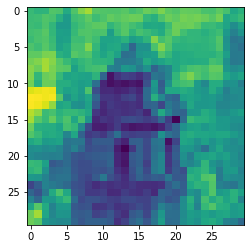

In [83]:
plt.imshow(img_arr[:,:,2])

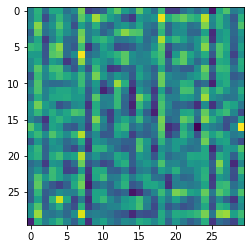

In [70]:
plt.imshow(final[:,:,2])